In [70]:
df_b = load_boston()
data_b = pd.DataFrame(df_b.data,columns = df_b.feature_names)
print(data_b.head())
print("Boston datset :  ",data_b.shape)
print("=============================================================================================")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
Boston datset :   (506, 13)


In [ ]:
#============================================lasso====================================================

best parameters:


{'alpha': 1e-15}
-25.501257883769615
Training accuracy : 0.72699

Testing accuracy : 0.77799

mean square error:  40.34885




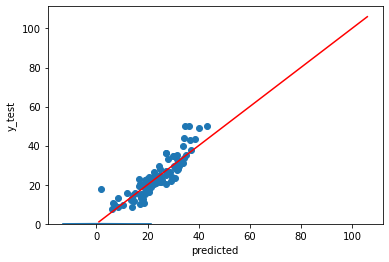

In [71]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings

warnings.filterwarnings('ignore', category = DeprecationWarning)
from warnings import filterwarnings
filterwarnings('ignore')

"""
There are 14 attributes in each case of the dataset.It has two prototasks: nox, in which the nitrous oxide 
level is to be predicted;and price, in which the median value of a home is to be predicted.
"""

df_b = load_boston()
data_b = pd.DataFrame(df_b.data,columns = df_b.feature_names)
data_b['PRICE'] = df_b.target
X_b = data_b.drop('PRICE',axis = 1)
y_b = data_b['PRICE']

X_train,X_test,y_train,y_test = train_test_split(X_b,y_b,test_size = 0.2,random_state = 129)
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-20,1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
# Let's check out the best parameter and best score
print("best parameters:\n\n")
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
prediction_lasso=lasso_regressor.predict(X_test)
# Prediction
y_pred_train_lasso1 = lasso_regressor.predict(X_train)
y_pred_test_lasso1 = lasso_regressor.predict(X_test)
print('Training accuracy : {}\n'.format(r2_score(y_train, y_pred_train_lasso1).round(5)))
print('Testing accuracy : {}'.format(r2_score(y_test, y_pred_test_lasso1).round(5)))

mse1 = cross_val_score(lasso_regressor, X_b, y_b, scoring = 'neg_mean_squared_error',cv=5)
mean_mse1 = np.mean(mse1)
print("\nmean square error: ",-(mean_mse1).round(5))
print("\n")

import seaborn as sns
sns.distplot(y_test-prediction_lasso)

X=[]
for i in range(1,107):
    X.append(i)
X=np.array(X)
plt.scatter(prediction_lasso,y_test)
plt.xlabel("predicted")
plt.ylabel("y_test")
plt.plot(X,X,color="red")

In [66]:
#=================================================Ridge======================================================

best parameter and the score:

{'alpha': 1e-25}
-25.50125788376963


Training accuracy : 0.72699

Testing accuracy : 0.77799

mean square error:  35.41282




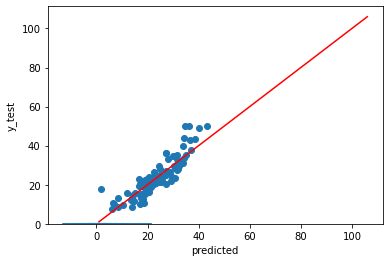

In [72]:
#ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


df_b = load_boston()
data_b = pd.DataFrame(df_b.data,columns = df_b.feature_names)
data_b['PRICE'] = df_b.target
X_b = data_b.drop('PRICE',axis = 1)
y_b = data_b['PRICE']
X_train,X_test,y_train,y_test = train_test_split(X_b,y_b,test_size = 0.2,random_state = 129)


ridge=Ridge()
parameters={'alpha':[1e-25,1e-20,1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
#checking out the best parameter and the score
print("best parameter and the score:\n")
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print("\n")
prediction_ridge=ridge_regressor.predict(X_test)
# Prediction

y_pred_train_ridge1 = ridge_regressor.predict(X_train)
y_pred_test_ridge1 = ridge_regressor.predict(X_test)
print('Training accuracy : {}\n'.format(r2_score(y_train, y_pred_train_ridge1).round(5)))
print('Testing accuracy : {}'.format(r2_score(y_test, y_pred_test_ridge1).round(5)))

mse1 = cross_val_score(ridge_regressor, X_b, y_b, scoring = 'neg_mean_squared_error',cv=5)
mean_mse1 = np.mean(mse1)
print("\nmean square error: ",-(mean_mse1).round(5))
print("\n")

import seaborn as sns
sns.distplot(y_test-prediction_ridge)

X=[]
for i in range(1,107):
    X.append(i)
X=np.array(X)
plt.scatter(prediction_ridge,y_test)
plt.xlabel("predicted")
plt.ylabel("y_test")
plt.plot(X,X,color="red")

In [ ]:
#==================================================knn====================================================

Training accuracy : 1.0

Testing accuracy : 0.27368


mean square error(cross validation score):  105.8743


KNN Regresson Model
         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
329   0.06724  0.0   3.24   0.0  0.460  6.333   17.2  5.2146   4.0  430.0   
371   9.23230  0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
219   0.11425  0.0  13.89   1.0  0.550  6.373   92.4  3.3633   5.0  276.0   
403  24.80170  0.0  18.10   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   
78    0.05646  0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
15    0.62739  0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
487   4.83567  0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
340   0.06151  0.0   5.19   0.0  0.515  5.968   58.5  4.8122   5.0  224.0   
310   2.63548  0.0   9.90   0.0  0.544  4.973   37.8  2.5194   4.0  304.0   
102   0.22876  0.0   8.56   0.0  0.520  6.405   85.4  2.7147   5.0  384.0   

     PTRATIO       B  L

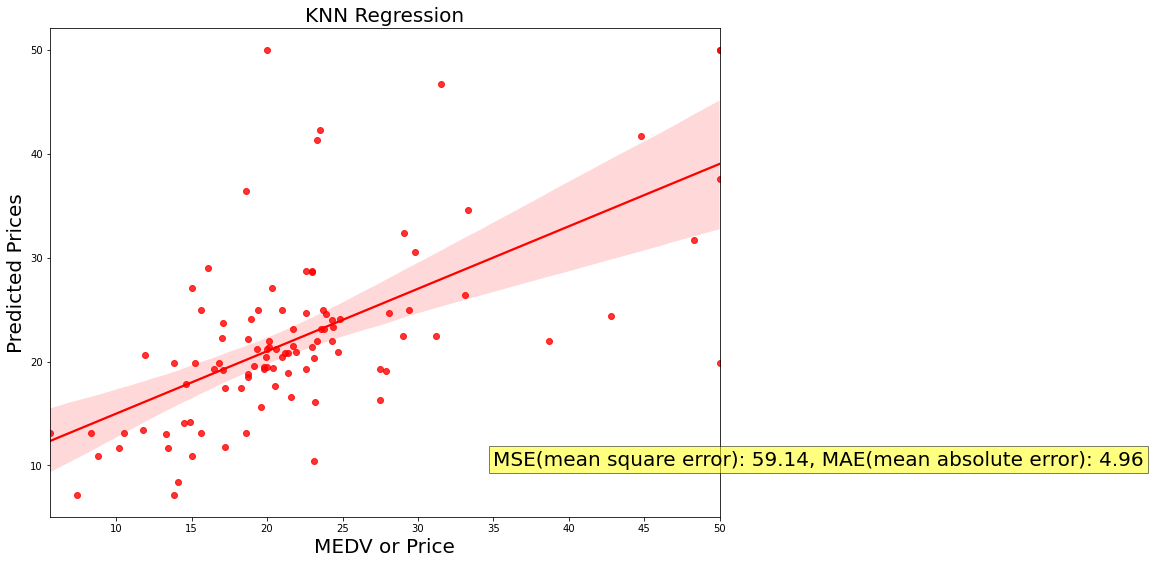

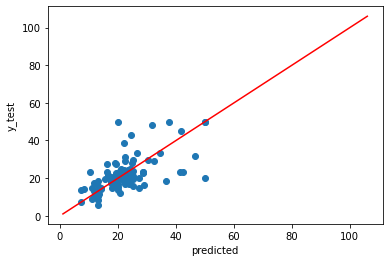

In [52]:
#knn

X_train, X_test, Y_train, Y_test = train_test_split(X_b, y_b, test_size = 0.20, random_state = 0)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(X_train, Y_train)

Y_pred = knr.predict(X_test) # Prediction


y_pred_train_knn1 = knr.predict(X_train)
y_pred_test_knn1 = knr.predict(X_test)
print('Training accuracy : {}\n'.format(r2_score(Y_train, y_pred_train_knn1).round(5)))
print('Testing accuracy : {}\n'.format(r2_score(Y_test, y_pred_test_knn1).round(5)))

mse1 = cross_val_score(knr, X_b, y_b, scoring = 'neg_mean_squared_error',cv=5)
mean_mse1 = np.mean(mse1)
print("\nmean square error(cross validation score): ",-(mean_mse1).round(5))
print("\n")

# Create Dataset with Testing values and Predicted Prices
print("KNN Regresson Model")
model_knn = pd.DataFrame(X_test)
model_knn['MEDV'] = Y_test
model_knn['Predicted MEDV'] = Y_pred
print(model_knn.head(10))
print("\n\n")

# Measure Performance of the Model
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Y_pred)

err = "MSE(mean square error): " + str(round(mse, 2)) + "," + " MAE(mean absolute error): " + str(round(mae, 2))
print("KNN Regresson Model Performance:-- ", err,"\n\n")

# Create Regression Plot for Test and Prediction values
fig = plt.figure(figsize=(12,9))
ax = sns.regplot(Y_test, Y_pred, marker = 'o', color = 'red')
ax.set_title('KNN Regression', fontsize=20)
ax.set_xlabel('MEDV or Price', fontsize=20)
ax.set_ylabel('Predicted Prices', fontsize=20)
# Save the KNN Regrassion Plot along with Error value
plt.text(35.0, 10.0, err, fontsize=20, bbox=dict(facecolor='yellow', alpha=0.5))
plt.savefig("KNNRegression.png", dpi=70)
plt.show()
plt.close(fig)

X=[]
for i in range(1,107):
    X.append(i)
X=np.array(X)
plt.scatter(Y_pred,Y_test)
plt.xlabel("predicted")
plt.ylabel("y_test")
plt.plot(X,X,color="red")

In [ ]:
#==================================================MLR========================================================

MLR Model
         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
329   0.06724  0.0   3.24   0.0  0.460  6.333   17.2  5.2146   4.0  430.0   
371   9.23230  0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
219   0.11425  0.0  13.89   1.0  0.550  6.373   92.4  3.3633   5.0  276.0   
403  24.80170  0.0  18.10   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   
78    0.05646  0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
15    0.62739  0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
487   4.83567  0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
340   0.06151  0.0   5.19   0.0  0.515  5.968   58.5  4.8122   5.0  224.0   
310   2.63548  0.0   9.90   0.0  0.544  4.973   37.8  2.5194   4.0  304.0   
102   0.22876  0.0   8.56   0.0  0.520  6.405   85.4  2.7147   5.0  384.0   

     PTRATIO       B  LSTAT  MEDV  Predicted MEDV  
329     16.9  375.21   7.34  22.6            19.3  
371     20.2  366.15   9.53  50.0     

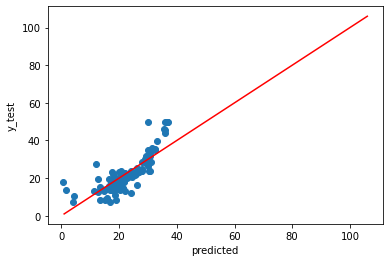

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

bh_data = load_boston()

boston = pd.DataFrame(bh_data.data, columns=bh_data.feature_names)
boston['MEDV'] = bh_data.target
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns=['LSTAT','RM'])
Y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)
from sklearn.linear_model import LinearRegression
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)

y_pred_train_mlr1 = lin_reg_mod.predict(X_train)
y_pred_test_mlr1 = lin_reg_mod.predict(X_test)


print("MLR Model")
model_mlr = pd.DataFrame(X_test)
model_mlr['MEDV'] = y_test
model_mlr['Predicted MEDV'] = pred
print(model_knn.head(10))
print("\n\n")

print('Training accuracy : {}\n'.format(r2_score(y_train, y_pred_train_mlr1).round(5)))
print('Testing accuracy : {}'.format(r2_score(y_test, y_pred_test_mlr1).round(5)))
print("\n")
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

print("RMSE: ",test_set_rmse)
print("r2 score: ",test_set_r2)
X=[]
for i in range(1,107):
    X.append(i)
X=np.array(X)
plt.scatter(pred,y_test)
plt.xlabel("predicted")
plt.ylabel("y_test")
plt.plot(X,X,color="red")

In [ ]:
#==================================================kernel cobra=========================================

kernel cobra Model
         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
329   0.06724  0.0   3.24   0.0  0.460  6.333   17.2  5.2146   4.0  430.0   
371   9.23230  0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
219   0.11425  0.0  13.89   1.0  0.550  6.373   92.4  3.3633   5.0  276.0   
403  24.80170  0.0  18.10   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   
78    0.05646  0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
15    0.62739  0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
487   4.83567  0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
340   0.06151  0.0   5.19   0.0  0.515  5.968   58.5  4.8122   5.0  224.0   
310   2.63548  0.0   9.90   0.0  0.544  4.973   37.8  2.5194   4.0  304.0   
102   0.22876  0.0   8.56   0.0  0.520  6.405   85.4  2.7147   5.0  384.0   

     PTRATIO       B  LSTAT  MEDV  Predicted MEDV  
329     16.9  375.21   7.34  22.6            19.3  
371     20.2  366.15   9.53  

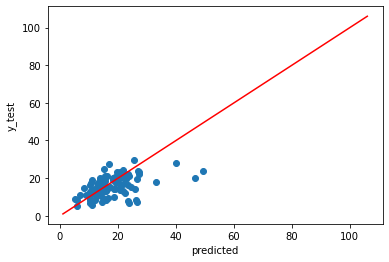

In [63]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from pycobra.cobra import Cobra
from pycobra.kernelcobra import KernelCobra
#from sklearn.datasets.samples_generator import make_regression
boston = datasets.load_boston()

# boston_X_train = boston.data[:-40]
# boston_X_test = boston.data[-40:]

# boston_y_train = boston.target[:-40]
# boston_y_test = boston.target[-40:]


boston_X_train = boston.data[:400]
boston_X_test = boston.data[400:]

boston_y_train = boston.target[:400]
boston_y_test = boston.target[400:]

from pycobra.cobra import Cobra
from pycobra.kernelcobra import KernelCobra

from pycobra.ewa import Ewa
from pycobra.diagnostics import Diagnostics
from pycobra.visualisation import Visualisation
import numpy as np

%matplotlib inline

boston_kernelcobra = KernelCobra()
boston_kernelcobra.fit(boston_X_train, boston_y_train)

kernel = KernelCobra()

kernel.fit(boston_X_train, boston_y_train)
kernel.predict(boston_X_test)

y_pred=kernel.predict(boston_X_test)
import matplotlib.pyplot as plt
import numpy as np

X=[]
for i in range(1,107):
    X.append(i)
X=np.array(X)


from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
prediction_kernel=kernel.predict(boston_X_test)

print("kernel cobra Model")
model_mlr = pd.DataFrame(boston_X_test)
model_mlr['MEDV'] = boston_y_test
model_mlr['Predicted MEDV'] = prediction_kernel
print(model_knn.head(10))
print("\n\n")

# Prediction
y_pred_train_kernel1 = kernel.predict(boston_X_train)
y_pred_test_kernel1 = kernel.predict(boston_X_test)
print('Training accuracy : {}\n'.format(r2_score(boston_y_train, y_pred_train_kernel1).round(5)))
print('Testing accuracy : {}'.format(r2_score(boston_y_test, y_pred_test_kernel1).round(5)))

mse1 = cross_val_score(kernel, boston.data, boston.target, scoring = 'neg_mean_squared_error',cv=5)
mean_mse1 = np.mean(mse1)
print("\nmean square error: ",-(mean_mse1).round(5))
print("\n")

plt.scatter(y_pred,boston_y_test)
plt.xlabel("predicted")
plt.ylabel("y_test")
plt.plot(X,X,color="red")